In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='circuit_2')

In [3]:
# Parameters' values

C1_value=150*1e-6     #(150 uF)
C2_value=100*1e-6     #(100 uF)
C3_value=220*1e-6     #(220 uF)

R1_value=100*1e3      #(100 k)
R2_value=10*1e3       #(10 k)


In [4]:
C1=bgt.new("C", value=C1_value)
C2=bgt.new("C", value=C2_value)
C3=bgt.new("C", value=C3_value)
R1=bgt.new("R", value=R1_value)
R2=bgt.new("R", value=R2_value)

In [5]:
zero_junc=bgt.new("0")
one_junc1=bgt.new("1")
one_junc2=bgt.new("1")

In [6]:
bgt.add(model,C1,C2,C3,R1,R2,zero_junc,one_junc1,one_junc2)

In [7]:
bgt.connect(C1,one_junc1)
bgt.connect(one_junc1,R1)
bgt.connect(one_junc1,zero_junc)
bgt.connect(zero_junc,C2)
bgt.connect(zero_junc,one_junc2)
bgt.connect(one_junc2,R2)
bgt.connect(one_junc2,C3)

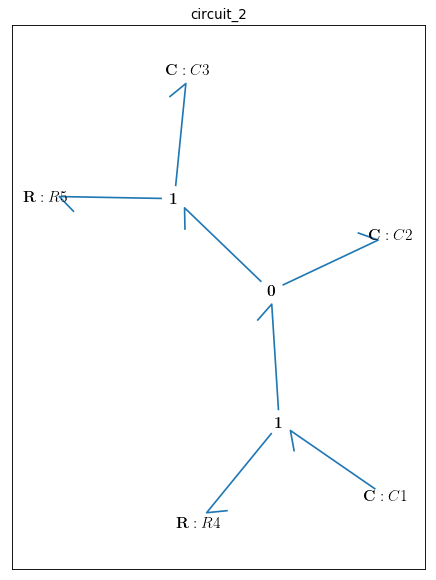

In [9]:
bgt.draw(model)

In [10]:
timespan=[0,50]

In [11]:
model.state_vars

{'x_0': (C: C1, 'q_0'), 'x_1': (C: C2, 'q_0'), 'x_2': (C: C3, 'q_0')}

In [12]:
x0={"x_0":1, "x_1":0, "x_2":0}

In [13]:
model.constitutive_relations

[dx_0 + x_0/15 - x_1/10,
 dx_1 - x_0/15 + 11*x_1/10 - 5*x_2/11,
 dx_2 - x_1 + 5*x_2/11]

In [14]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)

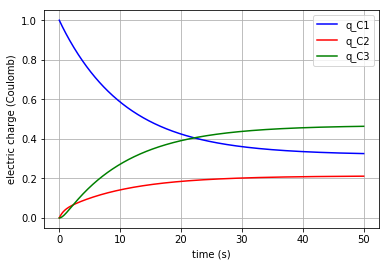

In [16]:
import matplotlib.pyplot as plt
plt.plot(t,x[:,0], '-b', label='q_C1')
plt.plot(t,x[:,1], '-r', label='q_C2')
plt.plot(t,x[:,2], '-g', label='q_C3')
plt.xlabel("time (s)")
plt.ylabel("electric charge (Coulomb)")
plt.legend(loc='upper right')
plt.grid()

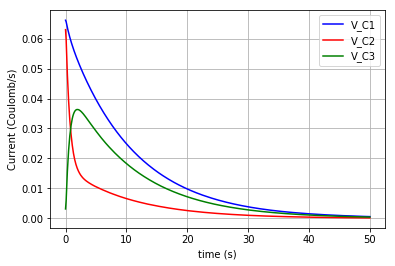

In [17]:
# - dq_C1/dt = v_C1 (flow)
import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v_C1=-slope
# dq_C2/dt = v_C2 (flow)
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v_C2=slope
# dq_C3/dt = v_C3 (flow)
f = np.array(x[:,2], dtype=float)
slope=np.gradient(f,0.1)
v_C3=slope

plt.plot(t,v_C1, '-b', label='V_C1')
plt.plot(t,v_C2, '-r', label='V_C2')
plt.plot(t,v_C3, '-g', label='V_C3')
plt.xlabel("time (s)")
plt.ylabel("flow (Coulomb/s)")
plt.legend(loc='upper right')
plt.grid()

In [19]:
u_R1=R1._params['r']*v_C1
u_R2=R2._params['r']*v_C3

u_C1=x[:,0]/C1._params['C']
u_C2=x[:,1]/C2._params['C']
u_C3=x[:,2]/C3._params['C']

Text(0,0.5,'Potential (J/Coulomb)')

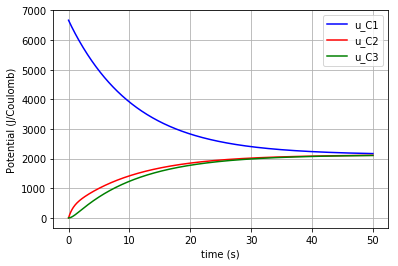

In [20]:
for u, c, label in [(u_C1,'-b','u_C1'), (u_C2,'-r','u_C2'), (u_C3,'-g','u_C3')]:
    fig=plt.plot(t,u,c,label=label)
    plt.legend(loc='upper right')
    
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("Potential (J/Coulomb)")
